In [1]:
%pip install scikit-learn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install keras -q
%pip install os -q

%pip install cvxopt -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random
import seaborn as sns
import os
import cvxEDA

C:\Users\goert\AppData\Local\Temp\ipykernel_15748\2780907528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

MAIN_PATH = os.path.dirname(os.getcwd())
DATA_PATH = MAIN_PATH + "/data/processed/WESAD"

QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

In [4]:
dataset = pd.read_csv(DATA_PATH + "/merged_data.csv")

In [5]:
dataset.dtypes

id           object
X           float64
Y           float64
datetime    float64
Z           float64
EDA         float64
TEMP        float64
HR          float64
dtype: object

In [6]:
dataset


id     X     Y      datetime     Z       EDA    TEMP      HR
0        S2  29.0  -6.0  1.495437e+09  55.0  0.000000  382.18  101.00
1        S2  29.0  -6.0  1.495437e+09  56.0  0.328021  382.18  101.00
2        S2  28.0  -6.0  1.495437e+09  56.0  0.410026  382.18  101.00
3        S2  29.0  -6.0  1.495437e+09  56.0  0.433090  382.18  101.00
4        S2  28.0  -6.0  1.495437e+09  55.0  0.444622   35.05  101.00
...     ...   ...   ...           ...   ...       ...     ...     ...
427785  S17  -7.0  12.0  1.502443e+09  58.0  1.542317   31.57   74.03
427786  S17  -3.0  13.0  1.502443e+09  64.0  1.562787   31.57   74.03
427787  S17  -2.0  13.0  1.502443e+09  60.0  1.700963   31.57   73.65
427788  S17  -1.0  13.0  1.502443e+09  62.0  1.748301   31.57   73.65
427789  S17  -3.0  13.0  1.502443e+09  62.0  1.748301   31.57   73.65

[427790 rows x 8 columns]

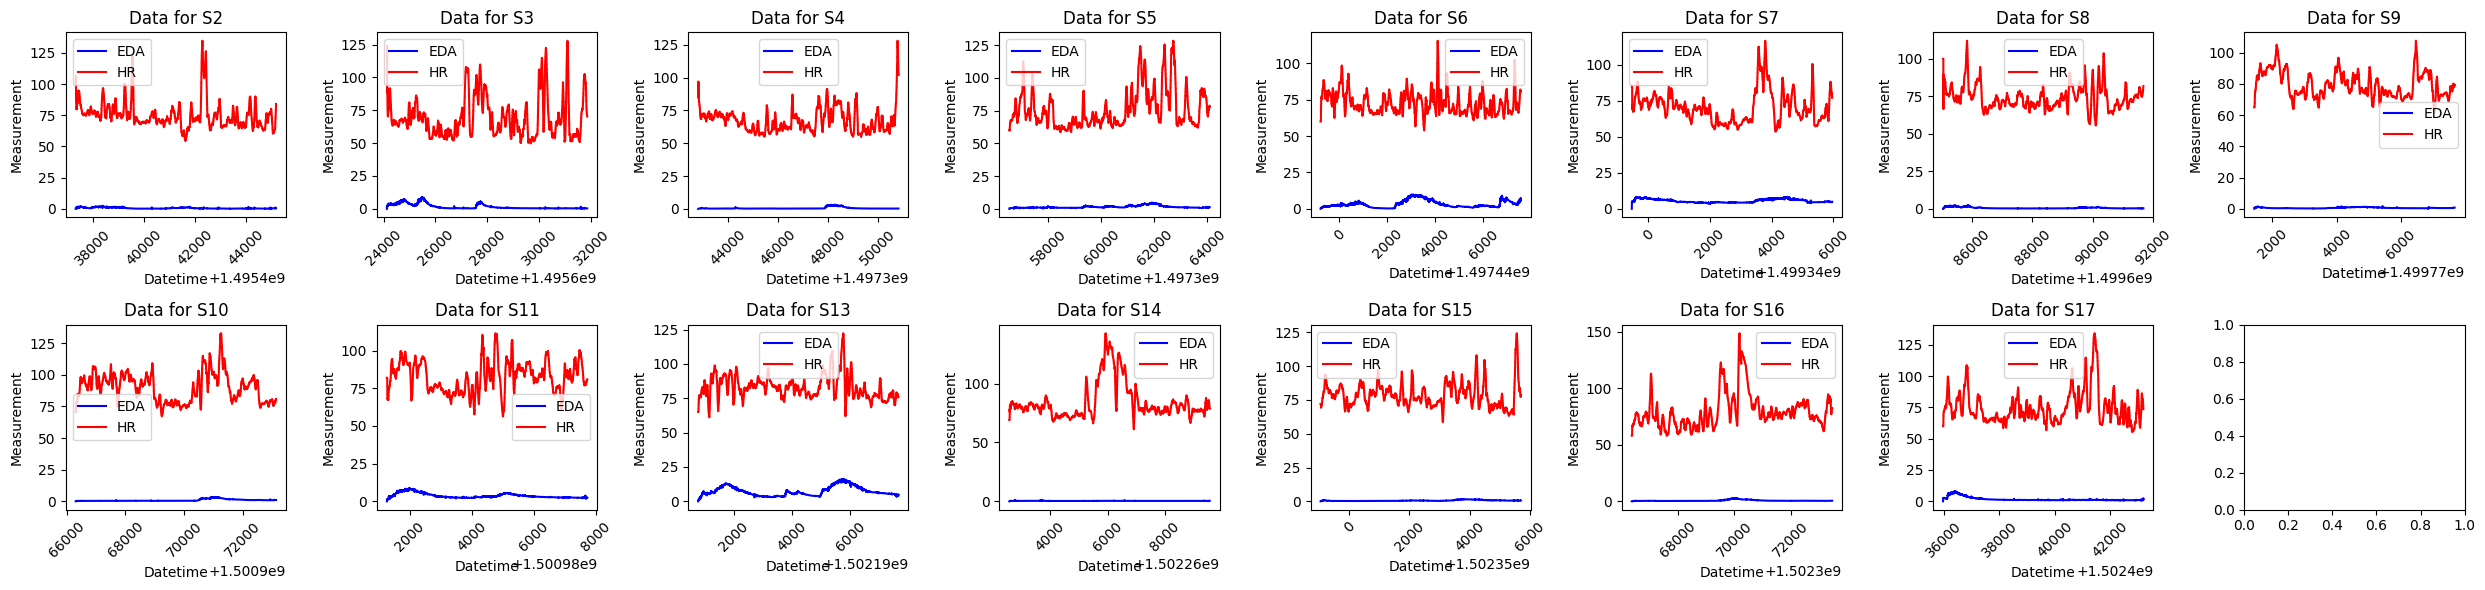

In [7]:
# Create subplots
fig, axes = plt.subplots(2, 8, figsize=(25, 6))  # Increased figure size
axes = axes.flatten()

# Define unique_ids
unique_ids = dataset['id'].unique()

# Iterate through each unique id
for i, ax in enumerate(axes):
    if i < len(unique_ids):
        # Filter data for each id
        subset_data = dataset[dataset['id'] == unique_ids[i]]
        
        # Plotting
        sns.lineplot(x='datetime', y='EDA', data=subset_data, ax=ax, color='blue', label='EDA')
        # sns.lineplot(x='datetime', y='TEMP', data=subset_data, ax=ax, color='orange', label='TEMP')
        sns.lineplot(x='datetime', y='HR', data=subset_data, ax=ax, color='red', label='HR')

        ax.set_title(f"Data for {unique_ids[i]}")
        ax.set_xlabel('Datetime')
        ax.set_ylabel('Measurement')
        ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

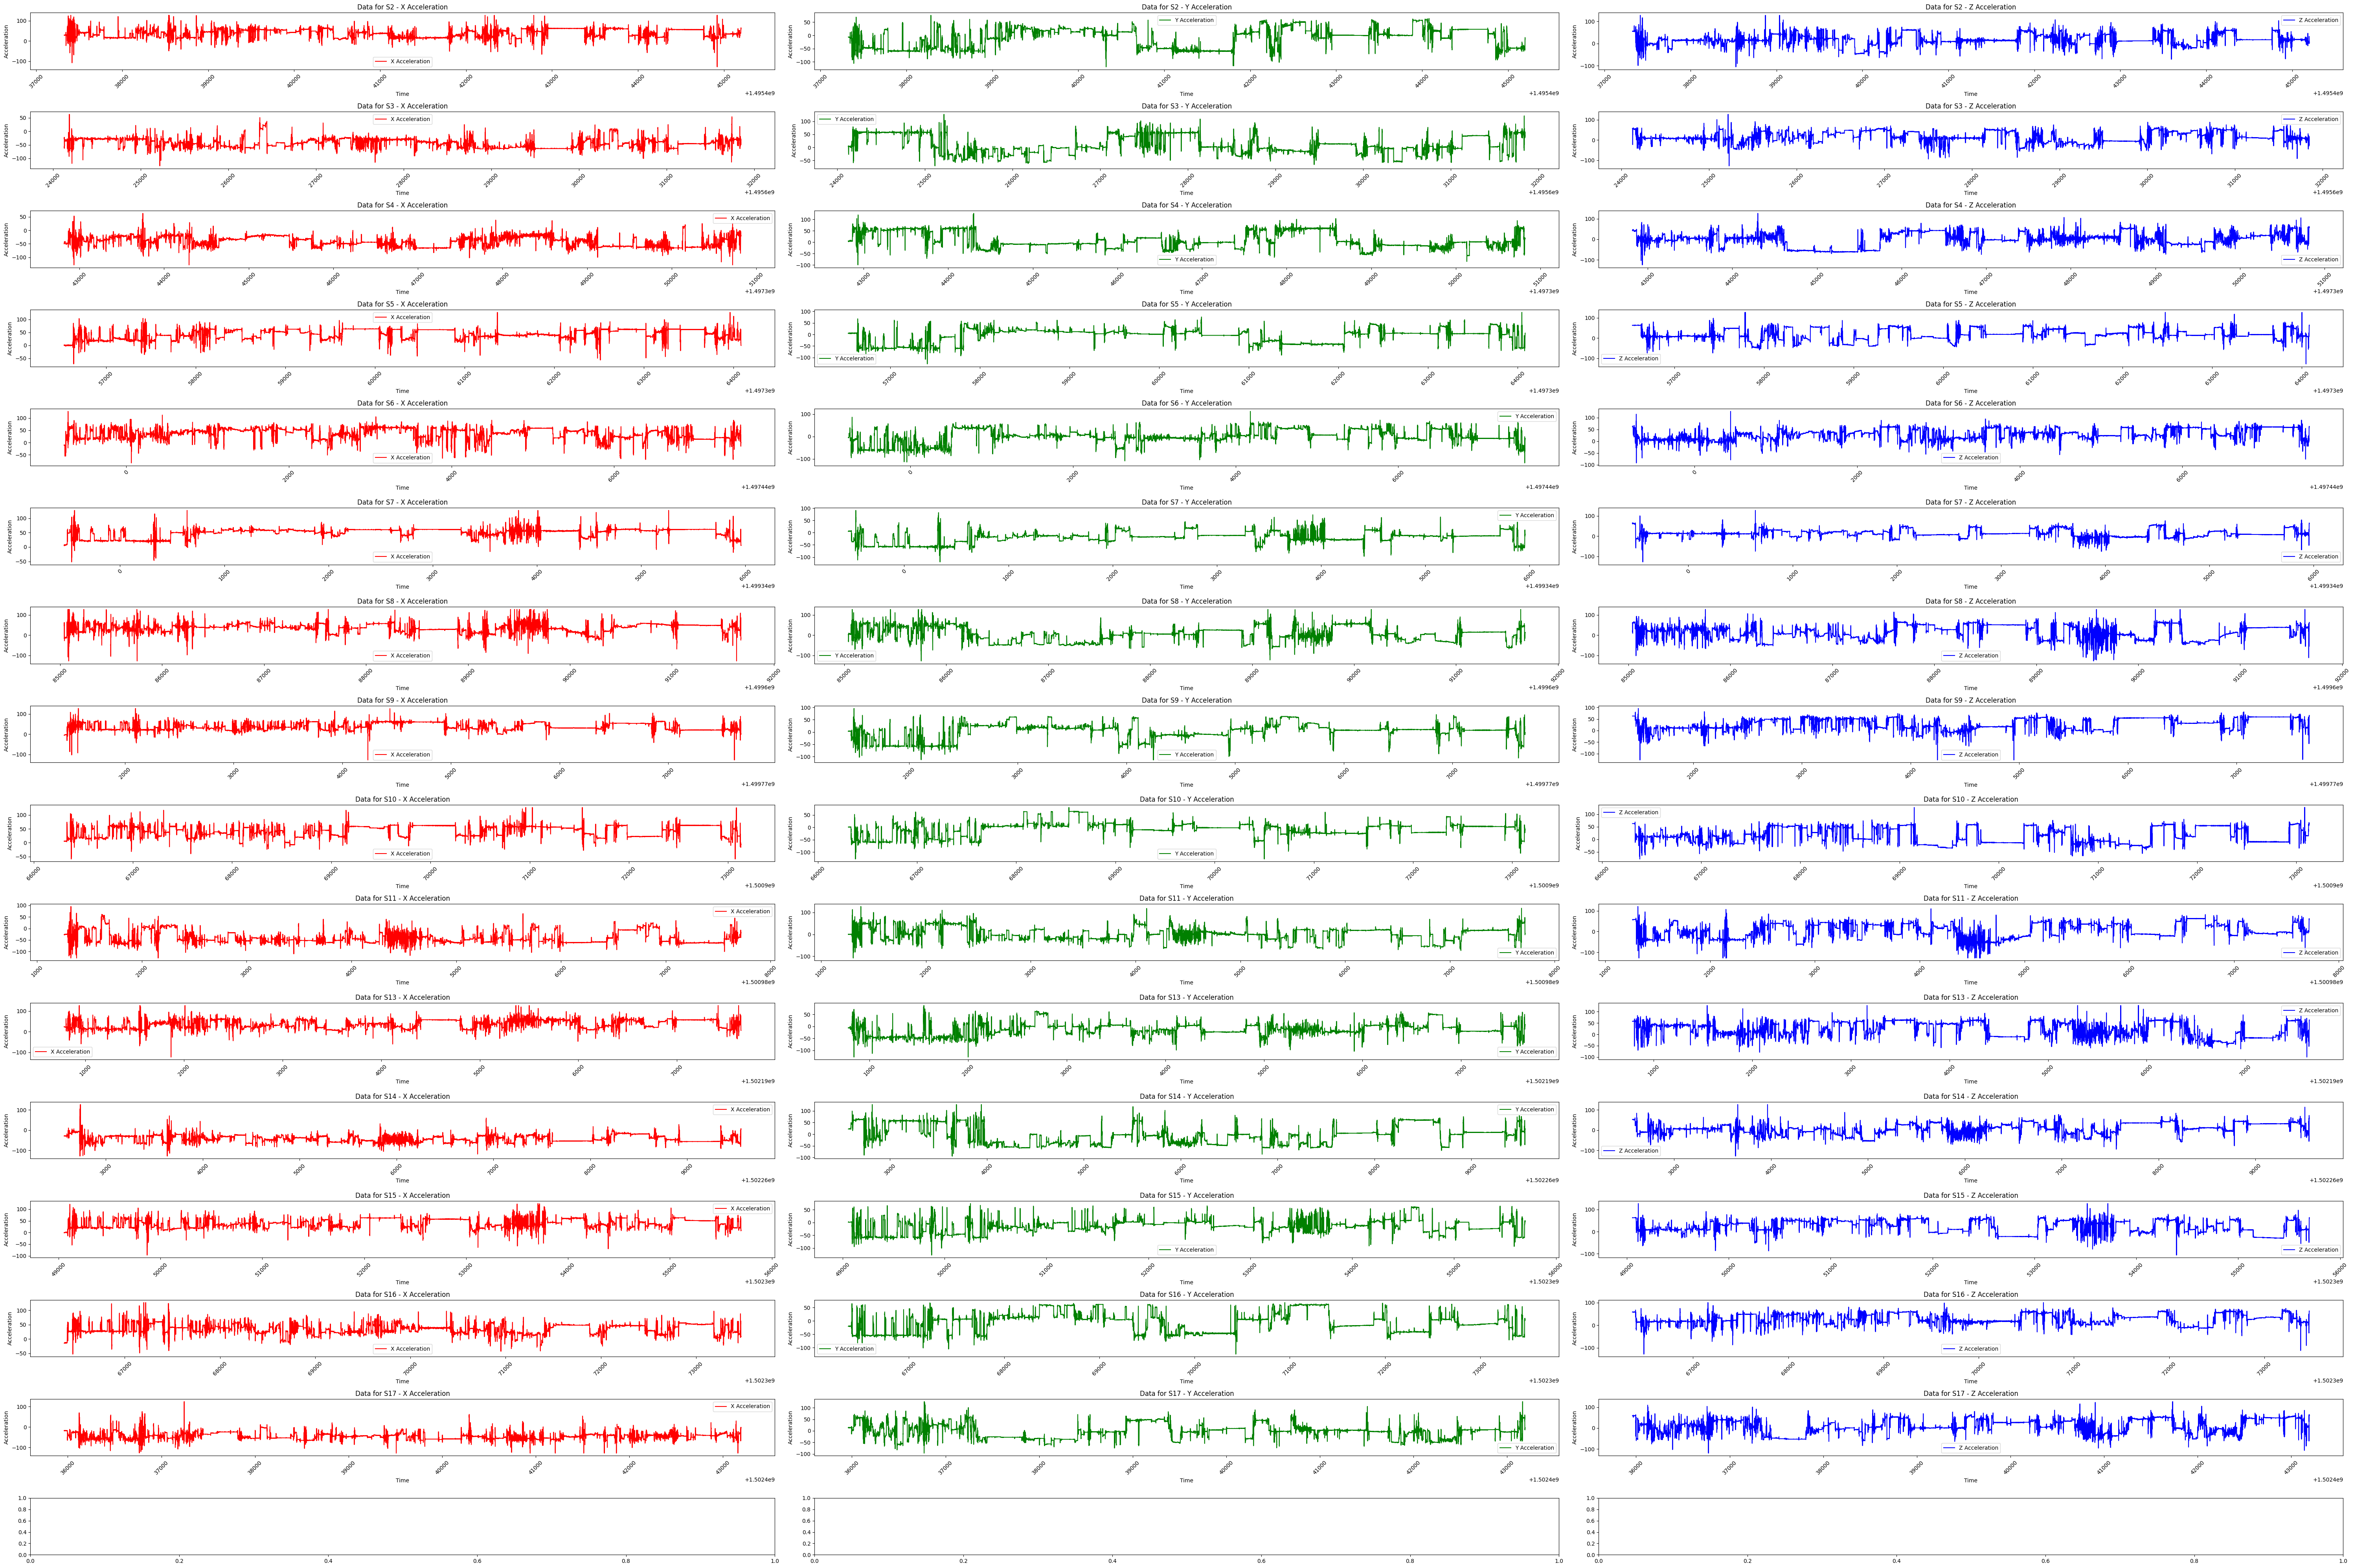

In [8]:
# Create subplots
fig, axes = plt.subplots(16, 3, figsize=(60, 40))  # Increased figure size

# Define colors for each acceleration component
colors = ['red', 'green', 'blue']

# Iterate through each unique id
for i, unique_id in enumerate(unique_ids):
    # Filter data for each id
    subset_data = dataset[dataset['id'] == unique_id]
    
    # Iterate through X, Y, and Z accelerations
    for j, accel_component in enumerate(['X', 'Y', 'Z']):
        ax = axes[i, j]  # Select the appropriate subplot
        
        # Plot acceleration component with different color
        ax.plot(subset_data['datetime'], subset_data[accel_component], label=f'{accel_component} Acceleration', color=colors[j])
        ax.set_title(f"Data for {unique_id} - {accel_component} Acceleration")
        ax.set_xlabel('Time')
        ax.set_ylabel('Acceleration')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:

import cvxEDA.src.cvxEDA

def calculate_eda_levels(y):
    fs_dict = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 700, 'Resp': 700}
    Fs = fs_dict['EDA']
    yn = (y - y.mean()) / y.std()
    [r, p, t, l, d, e, obj] = cvxEDA.src.cvxEDA.cvxEDA(yn, 1. / Fs)
    return [p, t]

# Example usage:
tonic, phasic = calculate_eda_levels(dataset[dataset['id'] == 'S14']['EDA'].values)
print("Phasic EDA:", phasic)
print("Tonic EDA:", tonic)


     pcost       dcost       gap    pres   dres
 0: -1.3192e+04 -1.2746e+04  4e+05  4e+02  1e+00
 1: -1.3446e+04 -1.0462e+05  1e+05  1e+02  3e-01
 2: -1.3556e+04 -5.1730e+04  4e+04  3e+01  8e-02
 3: -1.3613e+04 -3.2426e+04  2e+04  1e+01  3e-02
 4: -1.3630e+04 -2.8662e+04  2e+04  8e+00  2e-02
 5: -1.3646e+04 -2.3184e+04  1e+04  4e+00  1e-02
 6: -1.3650e+04 -1.8700e+04  5e+03  2e+00  5e-03
 7: -1.3648e+04 -1.6455e+04  3e+03  9e-01  2e-03
 8: -1.3631e+04 -1.4840e+04  1e+03  3e-01  8e-04
 9: -1.3671e+04 -1.3980e+04  3e+02  5e-02  1e-04
10: -1.3738e+04 -1.3871e+04  1e+02  2e-02  4e-05
11: -1.3783e+04 -1.3840e+04  6e+01  9e-04  3e-06
12: -1.3802e+04 -1.3837e+04  3e+01  4e-04  1e-06
13: -1.3820e+04 -1.3834e+04  1e+01  1e-04  3e-07
14: -1.3827e+04 -1.3833e+04  6e+00  3e-05  9e-08
15: -1.3829e+04 -1.3832e+04  2e+00  7e-06  2e-08
16: -1.3831e+04 -1.3831e+04  7e-01  1e-06  4e-09
17: -1.3831e+04 -1.3831e+04  2e-01  2e-07  6e-10
18: -1.3831e+04 -1.3831e+04  6e-02  5e-08  1e-10
19: -1.3831e+04 -1.38

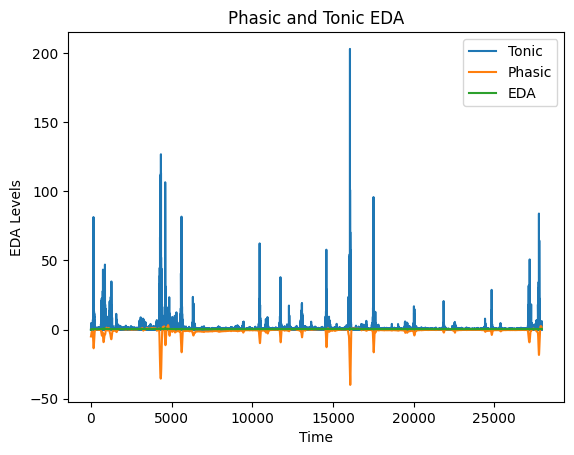

In [10]:
plt.plot(tonic, label='Tonic')
plt.plot(phasic, label='Phasic')
plt.plot(dataset[dataset['id'] == 'S14']['EDA'].values, label='EDA')

plt.xlabel('Time')
plt.ylabel('EDA Levels')
plt.title('Phasic and Tonic EDA')
plt.legend()
plt.show()